In [1]:
%pylab inline
import pandas as pa
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
run0 = pa.read_csv('test_logs/2016-06-30_run0.csv')

In [3]:
run0.head()

,Sample Time,300V Bus Volt (DS),Analog voltage,DeepSea reported Current,Analog current,RPM
0,1467298512,283.0,1.342,0.0,0.006,0.0
1,1467298512,283.0,1.343,0.0,0.004,0.0
2,1467298512,283.0,1.343,0.0,0.004,0.0
3,1467298512,283.0,1.344,0.0,0.007,0.0
4,1467298512,283.0,1.345,0.0,0.004,0.0


In [5]:
run0.describe()

,Sample Time,300V Bus Volt (DS),Analog voltage,DeepSea reported Current,Analog current,RPM
count,3.605000e+03,3605.000000,3605.000000,3.605000e+03,3605.000000,3605.000000
mean,1.443692e+09,356.159528,1.378961,2.320017e+06,0.005546,2103.827240
std,1.846380e+08,2179.640702,0.019869,1.830639e+07,0.001492,973.315104
min,-9.999000e+03,-9999.900000,1.328000,-9.999900e+03,0.002000,-9999.900000
25%,1.467299e+09,290.000000,1.378000,2.350000e+01,0.005000,2464.000000
50%,1.467299e+09,293.000000,1.388000,2.490000e+01,0.005000,2570.000000
75%,1.467299e+09,293.000000,1.392000,2.490000e+01,0.006000,2573.000000
max,1.467299e+09,65535.000000,1.400000,1.467299e+08,0.025000,2584.000000


In [8]:
run0 = run0.replace(-9999.9, np.nan)
run0 = run0.replace(65535, np.nan)
run0 = run0.fillna(method='pad')

In [14]:
run0["dscur"] = run0["DeepSea reported Current"]

In [20]:
run0.dscur = run0.dscur.apply(lambda x: x if x < 1000 else np.nan)
run0 = run0.fillna(method='pad')

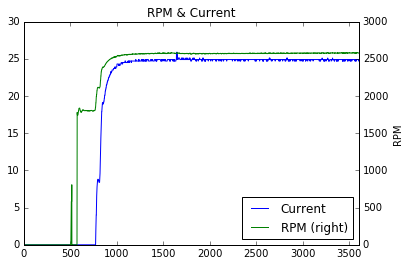

In [30]:
run0.dscur.plot(label="Current", legend=True)
run0.RPM.plot(label="RPM", legend=True, title="RPM & Current", secondary_y=True)
ylabel("RPM")

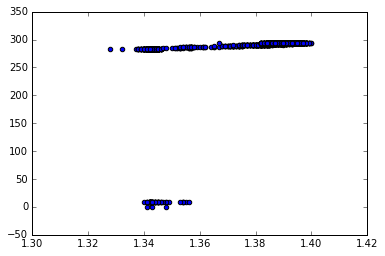

In [37]:
scatter(run0["Analog voltage"], run0["300V Bus Volt (DS)"])

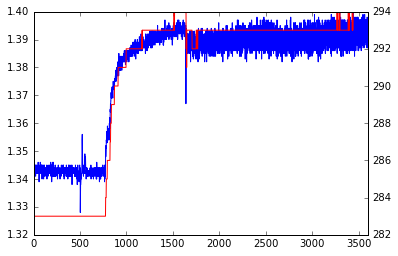

In [48]:
run0["Analog voltage"].plot()
run0["300V Bus Volt (DS)"] = run0["300V Bus Volt (DS)"].apply(lambda x: x if x > 50 else np.nan)
run0["300V Bus Volt (DS)"] = run0["300V Bus Volt (DS)"].fillna(method='pad')
run0["300V Bus Volt (DS)"].plot(style='r', secondary_y=True)

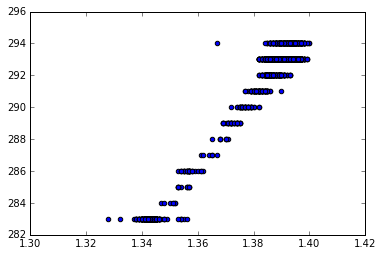

In [52]:
scatter(run0["Analog voltage"], run0["300V Bus Volt (DS)"])
fit = np.polyfit(run0["Analog voltage"], run0["300V Bus Volt (DS)"], deg=1)

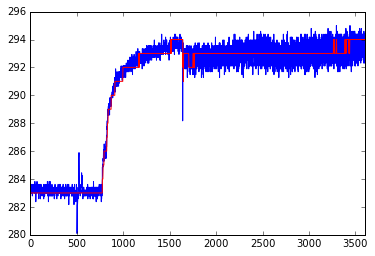

In [54]:
run0["an_volts_scaled"] = run0["Analog voltage"] * fit[0] + fit[1]
run0["an_volts_scaled"].plot()
run0["300V Bus Volt (DS)"].plot(style="r")

In [57]:
run0["an_cur"] = run0["Analog current"]

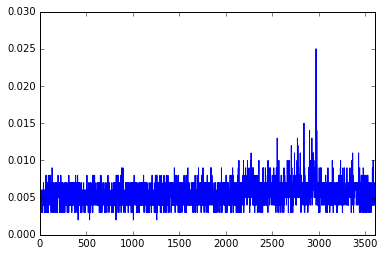

In [59]:
run0.an_cur.plot()


This is from before we had the current working - after a few runs, we switched the direction of the signal.